In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('/content/insurance.csv')

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

**Can you accurately predict insurance costs?**

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
cat_col = df.select_dtypes('object')

In [8]:
num_col = df.select_dtypes(['int64','float64'])

In [9]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print('*'*75)

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
***************************************************************************
sex
['female' 'male']
***************************************************************************
bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.9

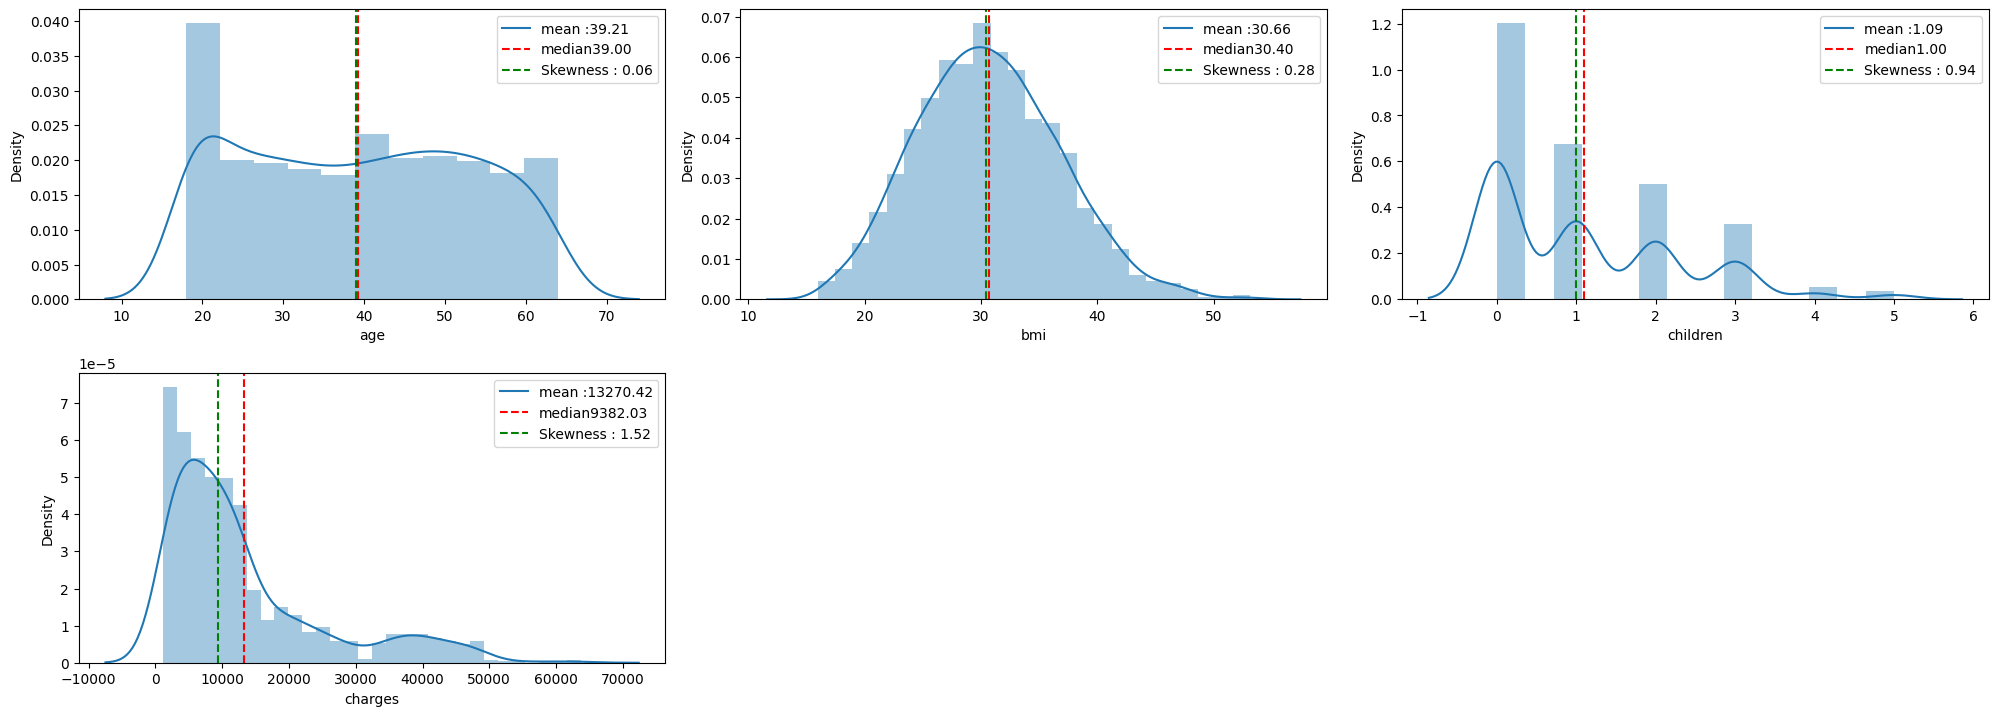

In [10]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(20,25))

for col in num_col:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.distplot(x=df[col])
  plt.axvline(x=np.mean(df[col]),c='r',ls='--')
  plt.axvline(x=np.median(df[col]),c='g',ls='--')
  plt.legend(('mean :%.2f'%(np.mean(df[col])),'median%.2f'%(np.median(df[col])),'Skewness : %.2f'%(df[col].skew())))
  c = c+1

plt.tight_layout()
plt.show()

In [11]:
#charges and children are positively skewed
#the other variable are relatively normally distributed

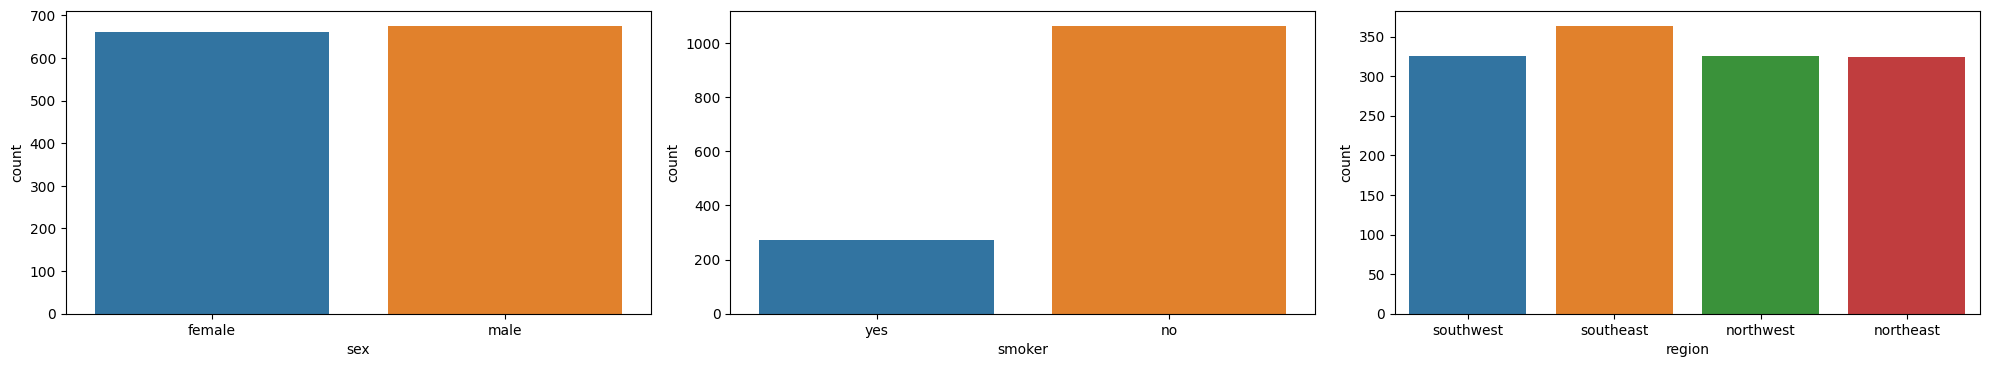

In [12]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(20,25))

for col in cat_col:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.countplot(x=df[col])
  c = c+1

plt.tight_layout()
plt.show()

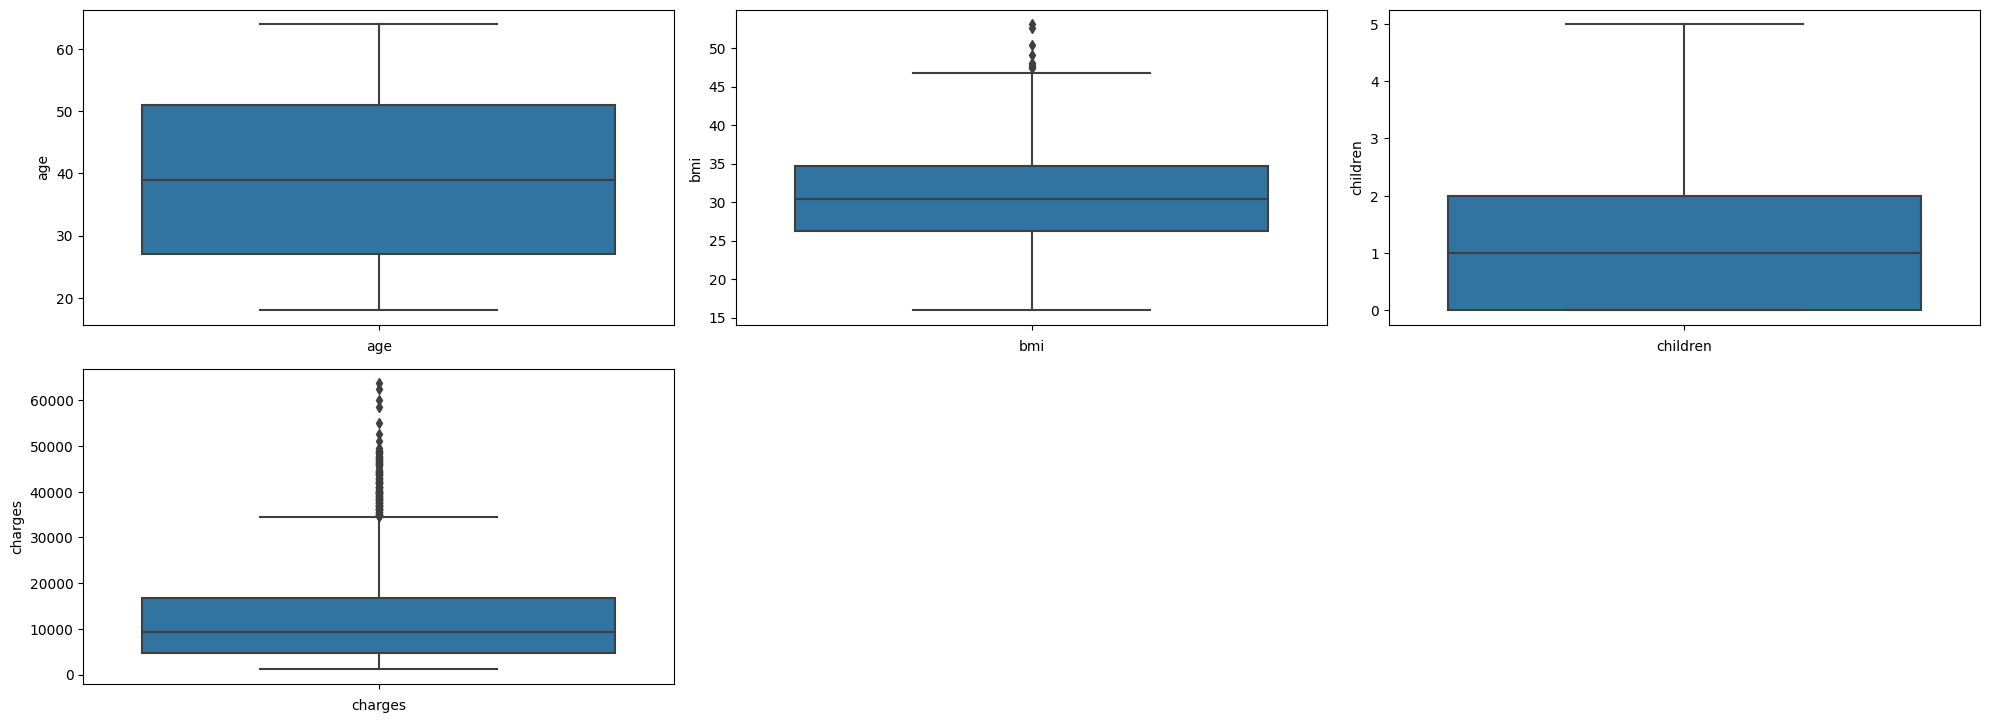

In [13]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(20,25))

for col in num_col:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.boxplot(y=df[col])
  c = c+1

plt.tight_layout()
plt.show()

In [14]:
#a lot of outliers in charges

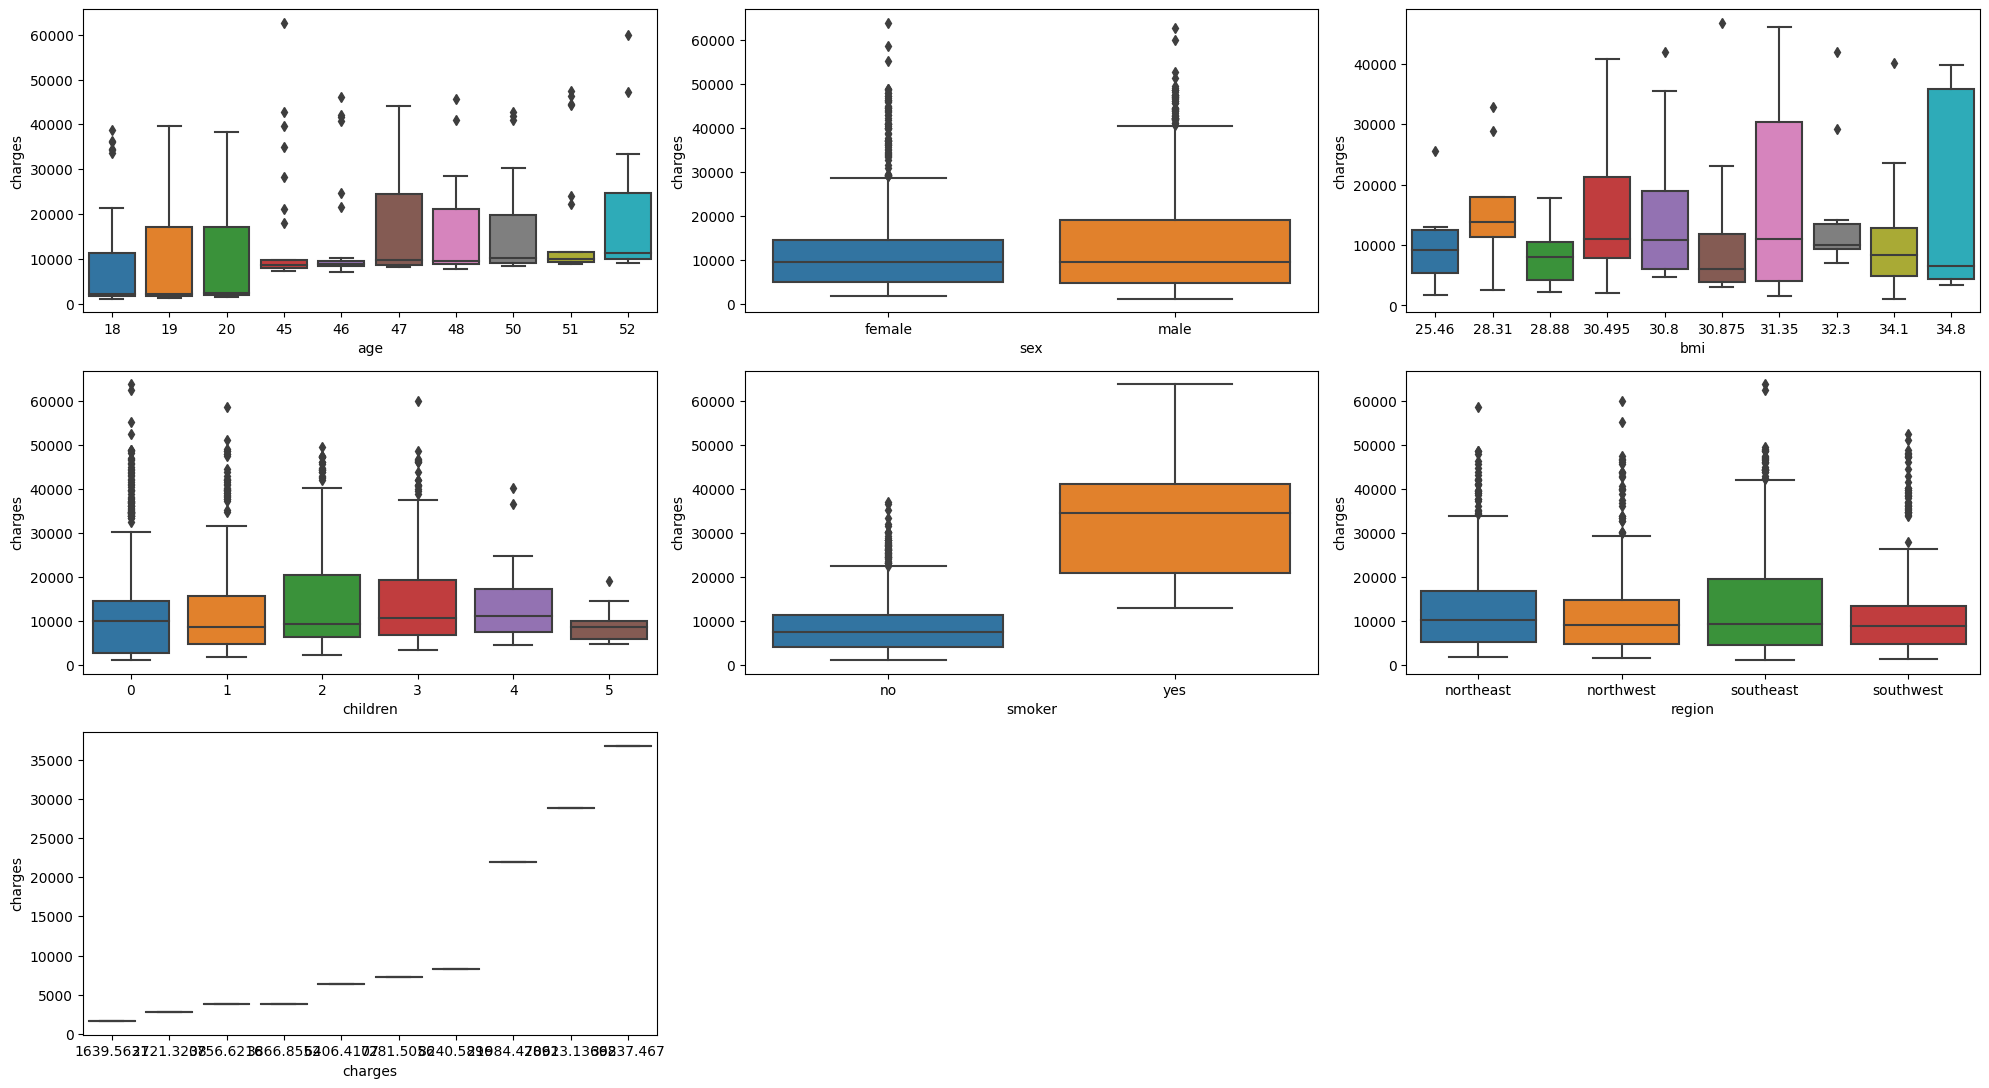

In [15]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(20,25))

for col in df.columns:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.boxplot(x=df[col],y=df['charges'],order=df[col].value_counts().sort_values(ascending=False).index[:10].sort_values(ascending=True))
  c = c+1

plt.tight_layout()
plt.show()

In [16]:
#charges go up with age
#higher for male and smokers

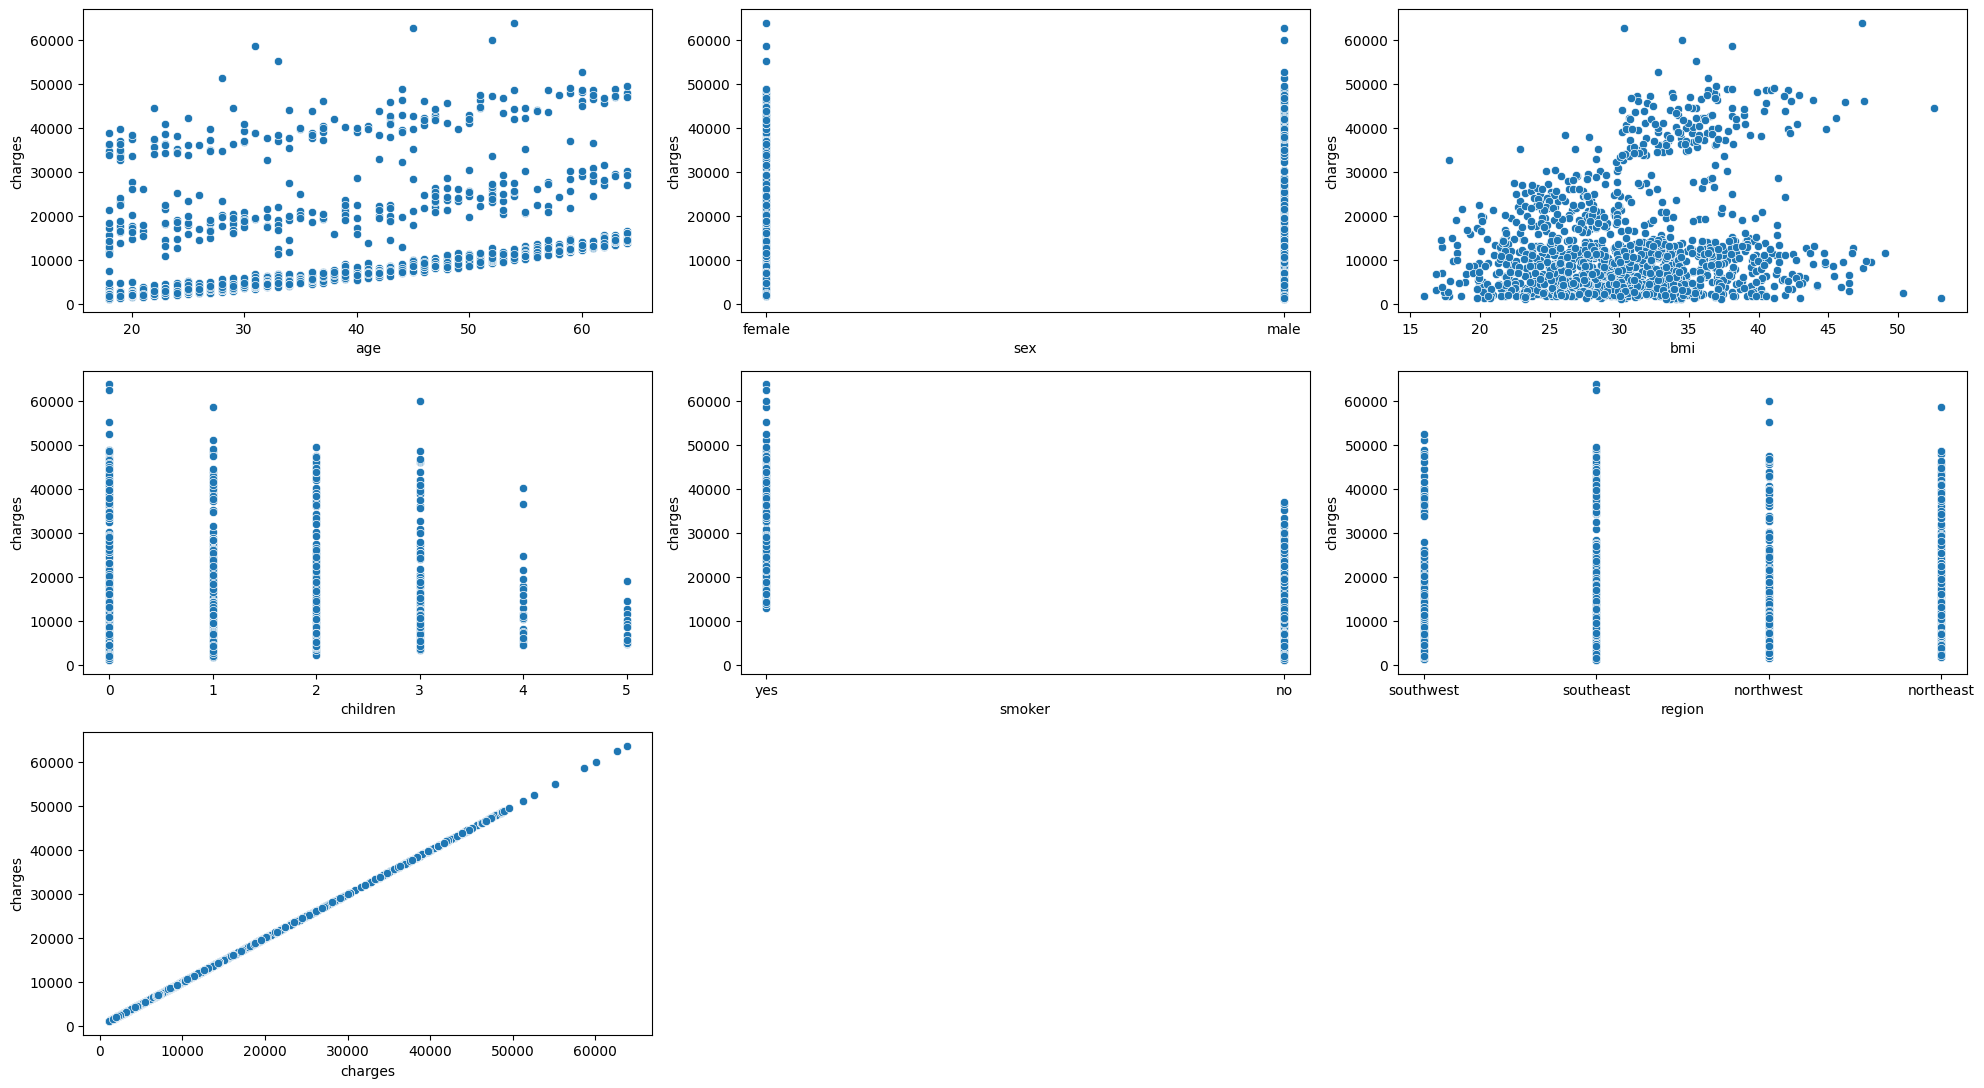

In [17]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(20,25))

for col in df.columns:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.scatterplot(x=col,y='charges',data=df)
  c = c+1

plt.tight_layout()
plt.show()

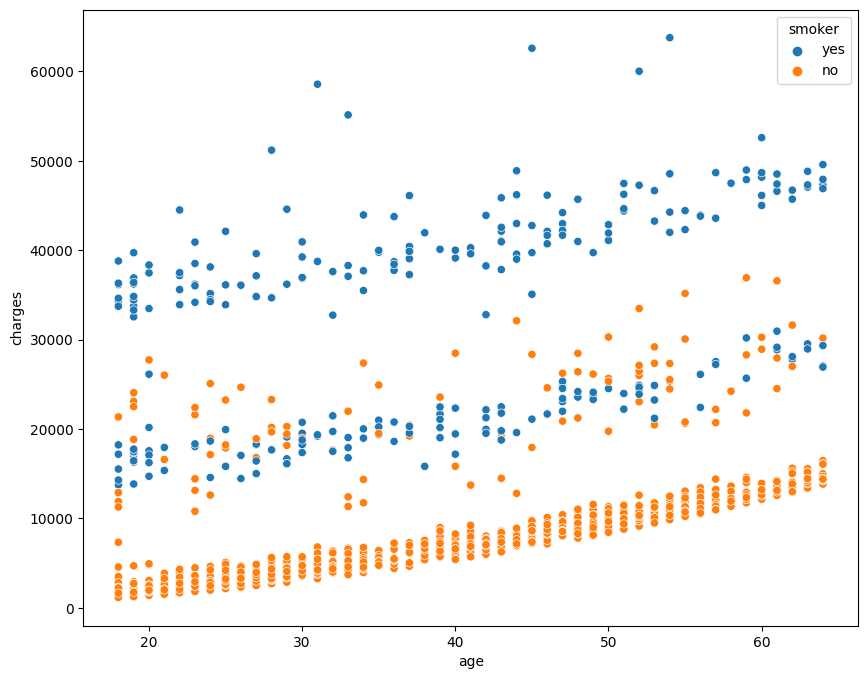

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,y='charges',x='age',hue='smoker')
plt.show()

In [19]:
#non smokers have the least ammount of charges
#smokers are in the upper two clusters 
#charges go up with age

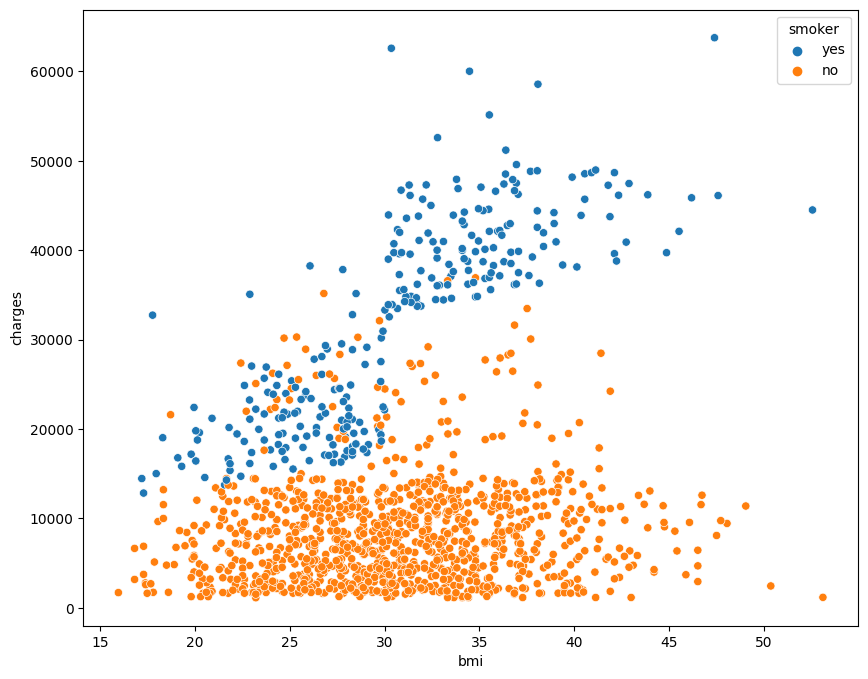

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,y='charges',x='bmi',hue='smoker')
plt.show()

In [21]:
#charges higher if you smoke no matter your bmi

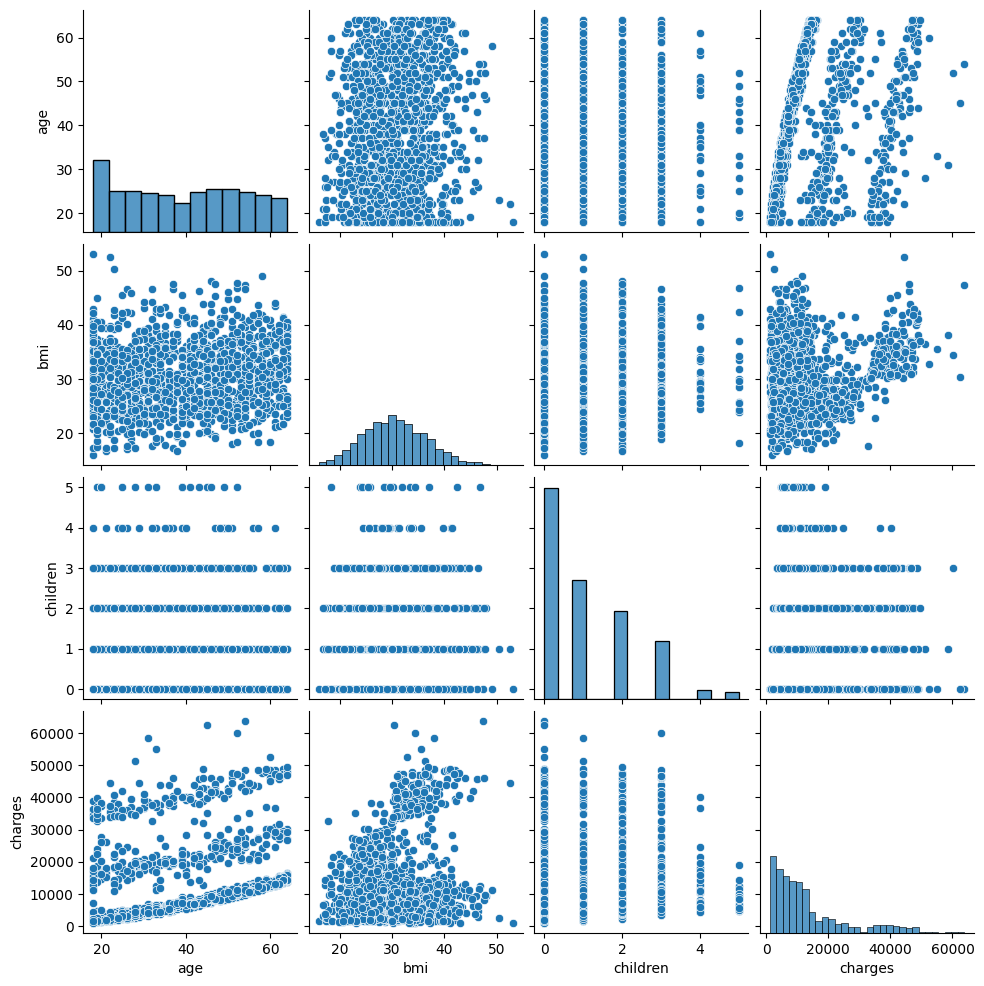

In [22]:
sns.pairplot(df)

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
df['sex'] = df['sex'].replace({'female':0,'male':1})
df['smoker'] = df['smoker'].replace({'no':0,'yes':1})
df['smoker'] = df['smoker'].replace({'no':0,'yes':1})
df['region'] = df['region'].replace({'northeast':0,'northwest':1,'southeast':2,'southwest':3})

In [25]:
# check outliers

for col in df.columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr=q3-q1
  lower_tail = q1 - 1.5 * iqr
  upper_tail = q3 + 1.5 * iqr
  data = df[(df[col] < upper_tail) & (df[col] > lower_tail)]

print(df.shape)
print('*'*10)
print(data.shape)

(1338, 7)
**********
(1199, 7)


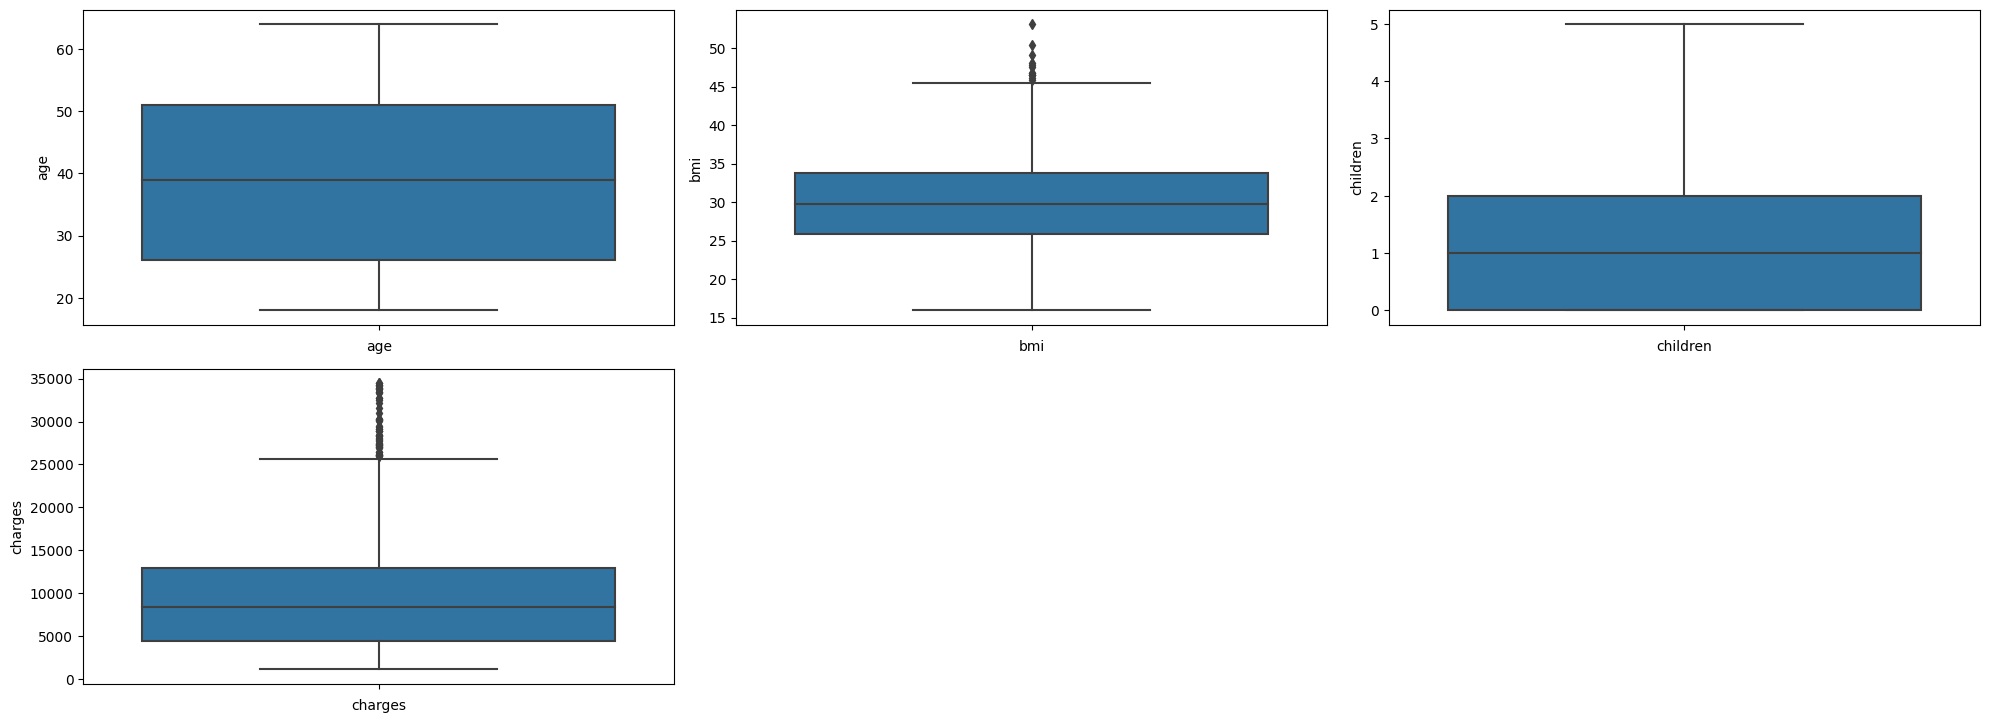

In [26]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(20,25))

for col in num_col:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.boxplot(y=data[col])
  c = c+1

plt.tight_layout()
plt.show()
#still a few but better

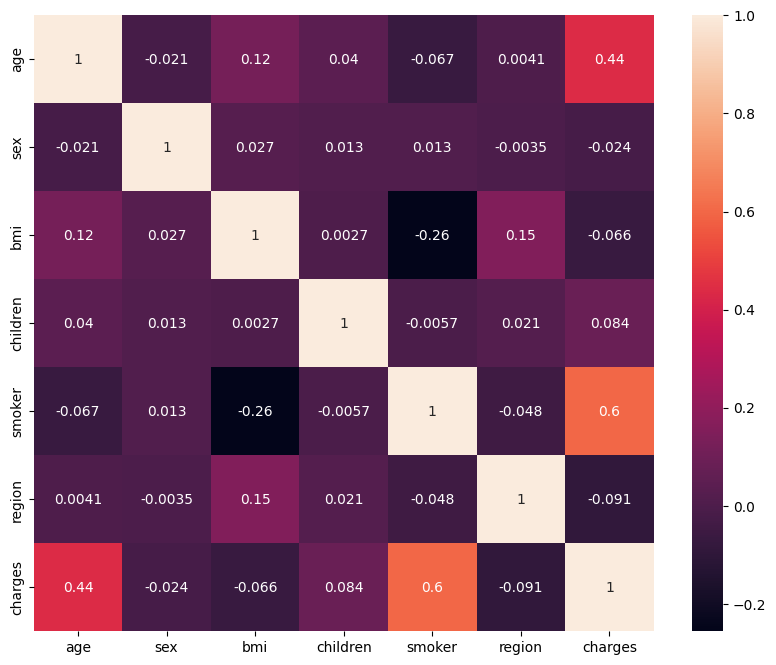

In [27]:
# check multico

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

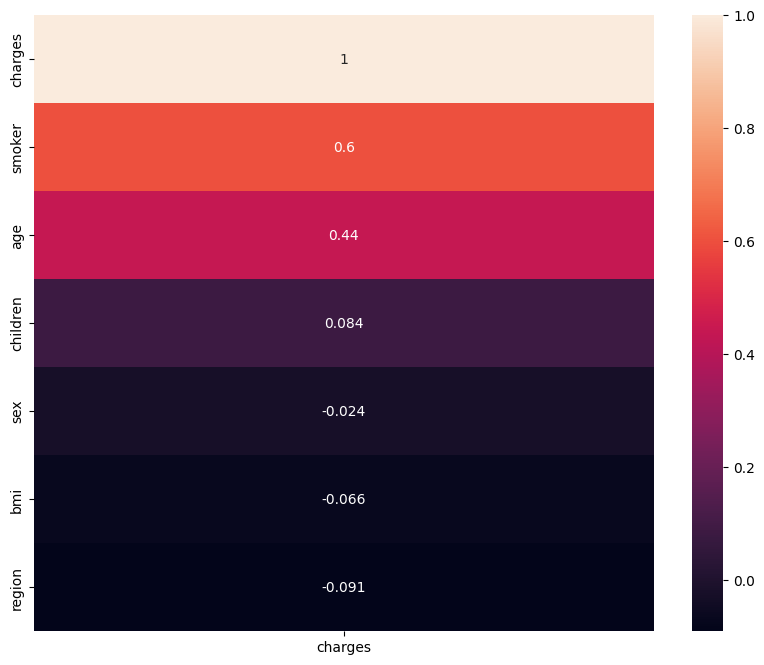

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr()[['charges']].sort_values(by='charges',ascending=False),annot=True)
plt.show()

In [29]:
#as expected smoker and charges are highly positively correlated

In [30]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

data_scaled = pd.DataFrame(ss.fit_transform(data),columns=data.columns,index=data.index)

In [31]:
# OLS

from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic
import statsmodels.api as sm


X = data_scaled.drop('charges',axis=1)
y = data_scaled['charges']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     303.4
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          7.29e-236
Time:                        22:40:47   Log-Likelihood:                -1145.6
No. Observations:                1199   AIC:                             2305.
Df Residuals:                    1192   BIC:                             2341.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.689e-17      0.018   1.48e-15      1.0

In [32]:
# R2 = 60%, pouvoir explicatif décent
#p value sex > 0.5 on ne rejette pas H0 hypothèse de non significativité au seuil 5%
#poru toutes les autres variables p-value < 0.05 on rejette  H0 hypothèse de non significativité au seuil 5%

In [33]:
data_signi = data_scaled.drop('sex',axis=1)

In [34]:
X = data_signi.drop('charges',axis=1)
y = data_signi['charges']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

y_pred = model.predict()
residuals = y - y_pred

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     363.4
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          9.40e-237
Time:                        22:40:47   Log-Likelihood:                -1146.5
No. Observations:                1199   AIC:                             2305.
Df Residuals:                    1193   BIC:                             2336.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.689e-17      0.018   1.48e-15      1.0

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


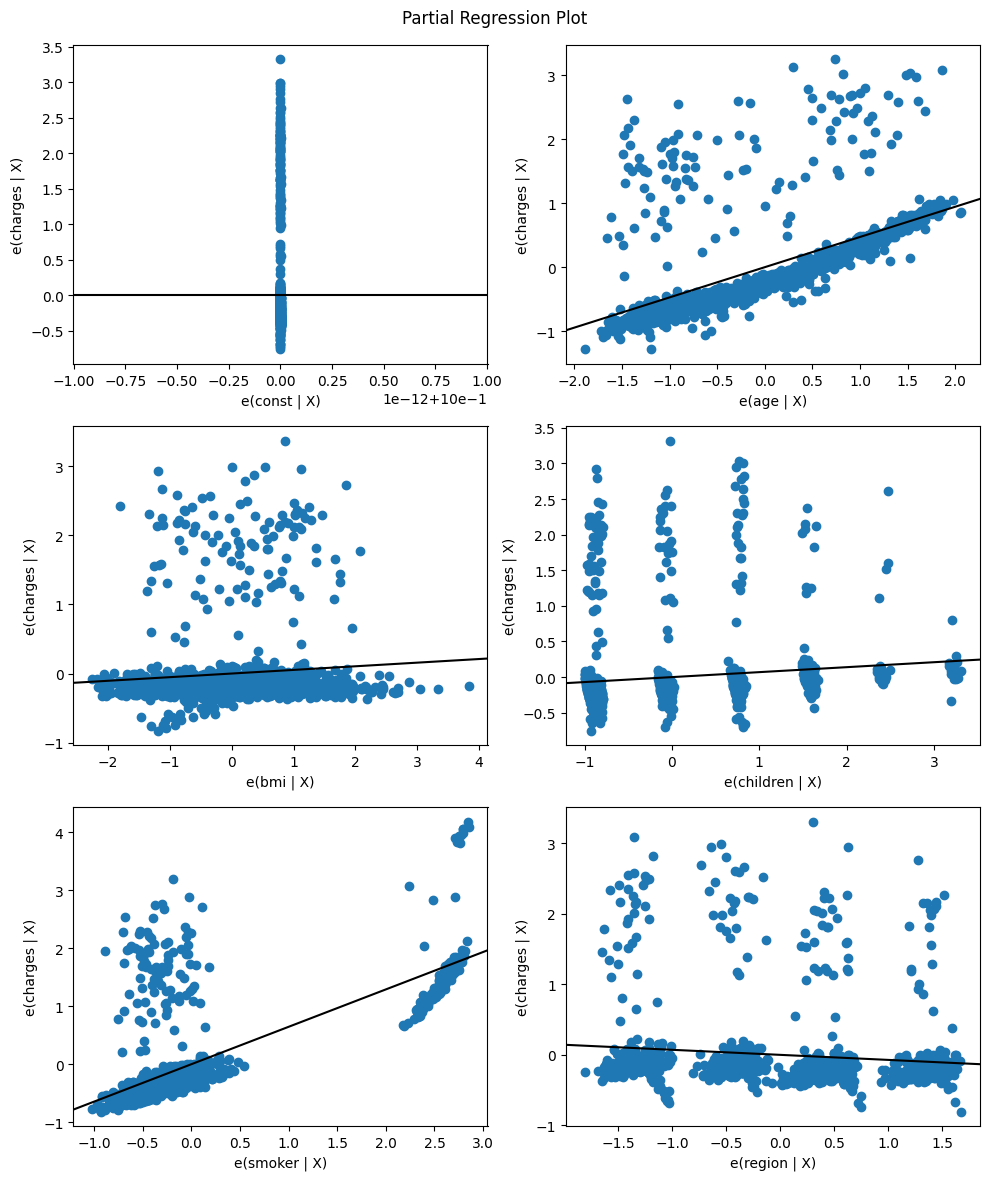

In [35]:
# Check assumptions
# linéarité

fig = plt.figure(figsize=(10,12))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [36]:
#linear relationship between depedent variable and independent ones 

In [37]:
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
#very close to zero

Mean of Residuals 1.4815319761469978e-18


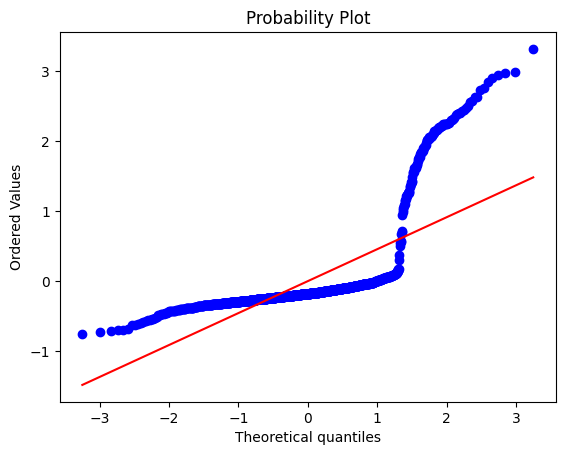

In [38]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

Text(0.5, 1.0, 'Normality of error terms/residuals')

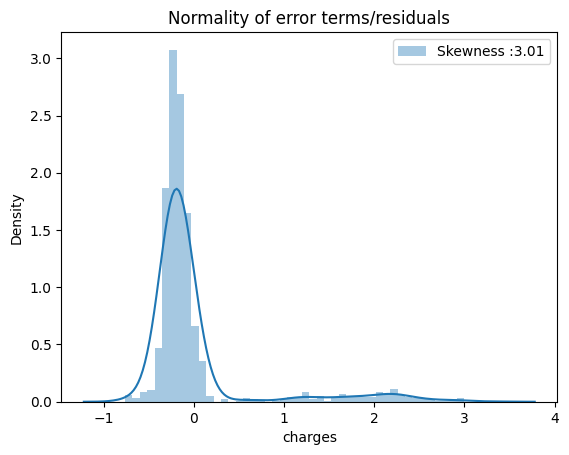

In [39]:
sns.distplot(residuals,kde=True,label='Skewness :%.2f'%(residuals.skew()))
plt.legend()
plt.title('Normality of error terms/residuals')

In [40]:
#prob(jb) < 0.5 on rejette H0 hypothese de distribution normale des résidus au seuil 5%

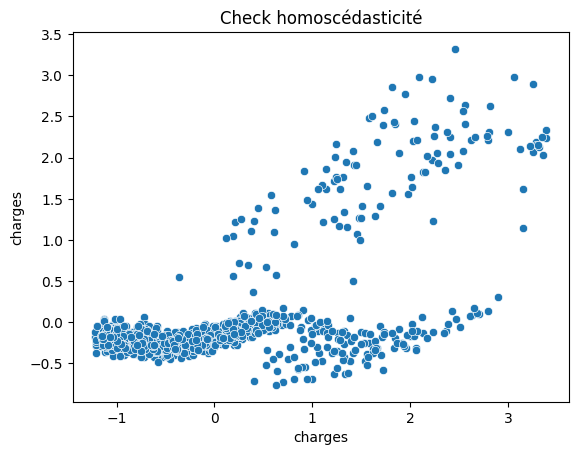

In [41]:
sns.scatterplot(x=y,y=residuals)
plt.title('Check homoscédasticité')
plt.show()

In [42]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 15.798373953724221),
 ('p-value', 0.007443933940098722),
 ('f-value', 3.1858408088522863),
 ('f p-value', 0.007304899390989418)]

In [43]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sm.stats.diagnostic.het_white(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 63.179332053793125),
 ('p-value', 1.2029182219740895e-06),
 ('f-value', 3.451639793125934),
 ('f p-value', 7.991054086746958e-07)]

In [44]:
# p-value < 0,05 on rejette H0: hypothese d'homoscedasticité

Text(0, 0.5, 'Residual')

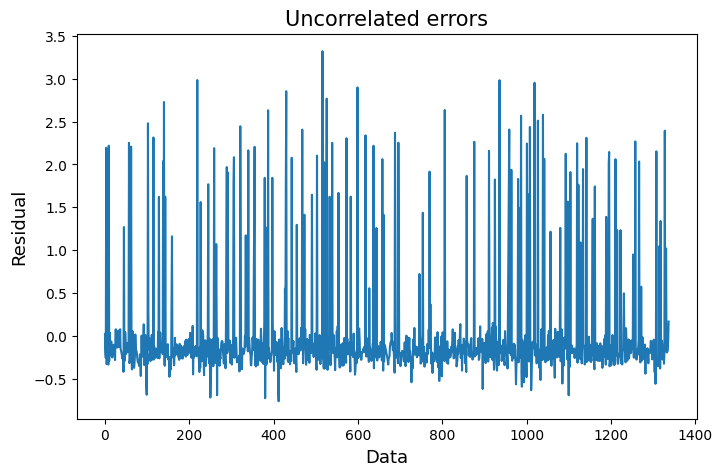

In [45]:
residuals_info = pd.DataFrame({'y_true': y, 'y_pred': y_pred, 'error': residuals}, columns=['y_true', 'y_pred', 'error'])
fig, ax = plt.subplots(figsize=(8,5))
ax = residuals_info.error.plot()
ax.set_title('Uncorrelated errors', fontsize=15)
ax.set_xlabel("Data", fontsize=13)
ax.set_ylabel("Residual", fontsize=13)

In [46]:
# DW = 2 on conclut donc a l'abscence d'autocorellation des erreurs

In [47]:
import statsmodels.api as sm


def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [48]:
vif_cal(input_data=data, dependent_col='charges')

,Var,Vif
2,bmi,10.05
0,age,7.60
5,region,2.85
1,sex,1.92
3,children,1.77
4,smoker,1.10


In [49]:
#vif > 5 pour bmi et age, signes de multicolinéarité

In [50]:
data_log = data.copy()
data_log['charges'] = np.log(data_log['charges'])

In [51]:
#data_log.replace([np.inf, -np.inf], np.nan, inplace=True)
#data_log.dropna(inplace=True)

In [52]:
#data_log.head()

In [53]:
X = data_log.drop('charges',axis=1)
y = data_log['charges']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

y_pred = model.predict()
residuals = y - y_pred

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     484.7
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          1.53e-315
Time:                        22:40:54   Log-Likelihood:                -687.27
No. Observations:                1199   AIC:                             1389.
Df Residuals:                    1192   BIC:                             1424.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1926      0.074     96.650      0.0

In [54]:
#better R2
#p-values de toutes les variables <0.05, on rejette  H0 hypothese de non significativité
#DW = 2 on suppose absence d'autocorrelation des erreus
#Prob(JB) < 0,05 on rejette H0: distribution normale des résidus

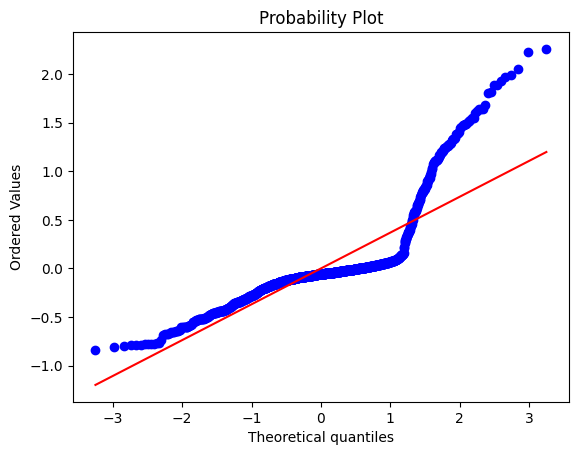

In [55]:
stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

In [56]:
data_log_2 = data.copy()
for col in data_log_2:
  data_log_2[col] = np.log1p(data_log_2[col])

In [57]:
X = data_log_2.drop('charges',axis=1)
y = data_log_2['charges']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

y_pred = model.predict()
residuals = y - y_pred

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     483.5
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          4.27e-315
Time:                        22:40:55   Log-Likelihood:                -688.07
No. Observations:                1199   AIC:                             1390.
Df Residuals:                    1192   BIC:                             1426.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1646      0.247     12.791      0.0

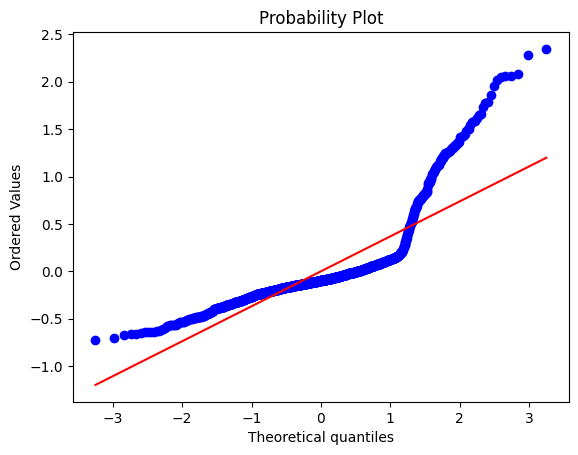

In [58]:
stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

In [59]:
#the same assumptions are still being violated

In [60]:
#other regression models with less regarding assumptions

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#using the same df than the most accurate OLS regression

X = data_log_2.drop('charges',axis=1)
y = data_log_2['charges']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3)

In [61]:
X_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [62]:
dtr  = DecisionTreeRegressor()
dtr.fit(X_scaled, y_train)
y_pred = dtr.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.4883614600077617

In [63]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dtr, X_train, y_train, cv=10, scoring='r2')
cv_scores.mean()

0.5763590984641845